In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e6/sample_submission.csv
/kaggle/input/playground-series-s5e6/train.csv
/kaggle/input/playground-series-s5e6/test.csv
/kaggle/input/fertilizer-prediction/Fertilizer Prediction.csv


In [2]:
import matplotlib.pyplot as plt

# statistic
from scipy.stats import chi2_contingency



In [3]:
train = pd.read_csv("/kaggle/input/playground-series-s5e6/train.csv")
train.head()
y = pd.read_csv("/kaggle/input/fertilizer-prediction/Fertilizer Prediction.csv")
# y.head()

In [4]:
train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [5]:
print("Duplicates = ",train.duplicated().sum())
print("Null or NA = ", train.isna().sum().sum())

Duplicates =  0
Null or NA =  0


In [6]:
train.describe()

,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [7]:
pd.read_csv("/kaggle/input/playground-series-s5e6/test.csv")

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,750000,31,70,52,Sandy,Wheat,34,11,24
1,750001,27,62,45,Red,Sugarcane,30,14,15
2,750002,28,72,28,Clayey,Ground Nuts,14,15,4
3,750003,37,53,57,Black,Ground Nuts,18,17,36
4,750004,31,55,32,Red,Pulses,13,19,14
...,...,...,...,...,...,...,...,...,...
249995,999995,26,66,30,Red,Sugarcane,14,7,18
249996,999996,33,62,55,Red,Pulses,28,14,7
249997,999997,36,53,64,Black,Paddy,28,11,27
249998,999998,36,67,26,Clayey,Paddy,33,0,10


Plot histogram of the soil type, crop type, fertilizer name to visualise the distribution

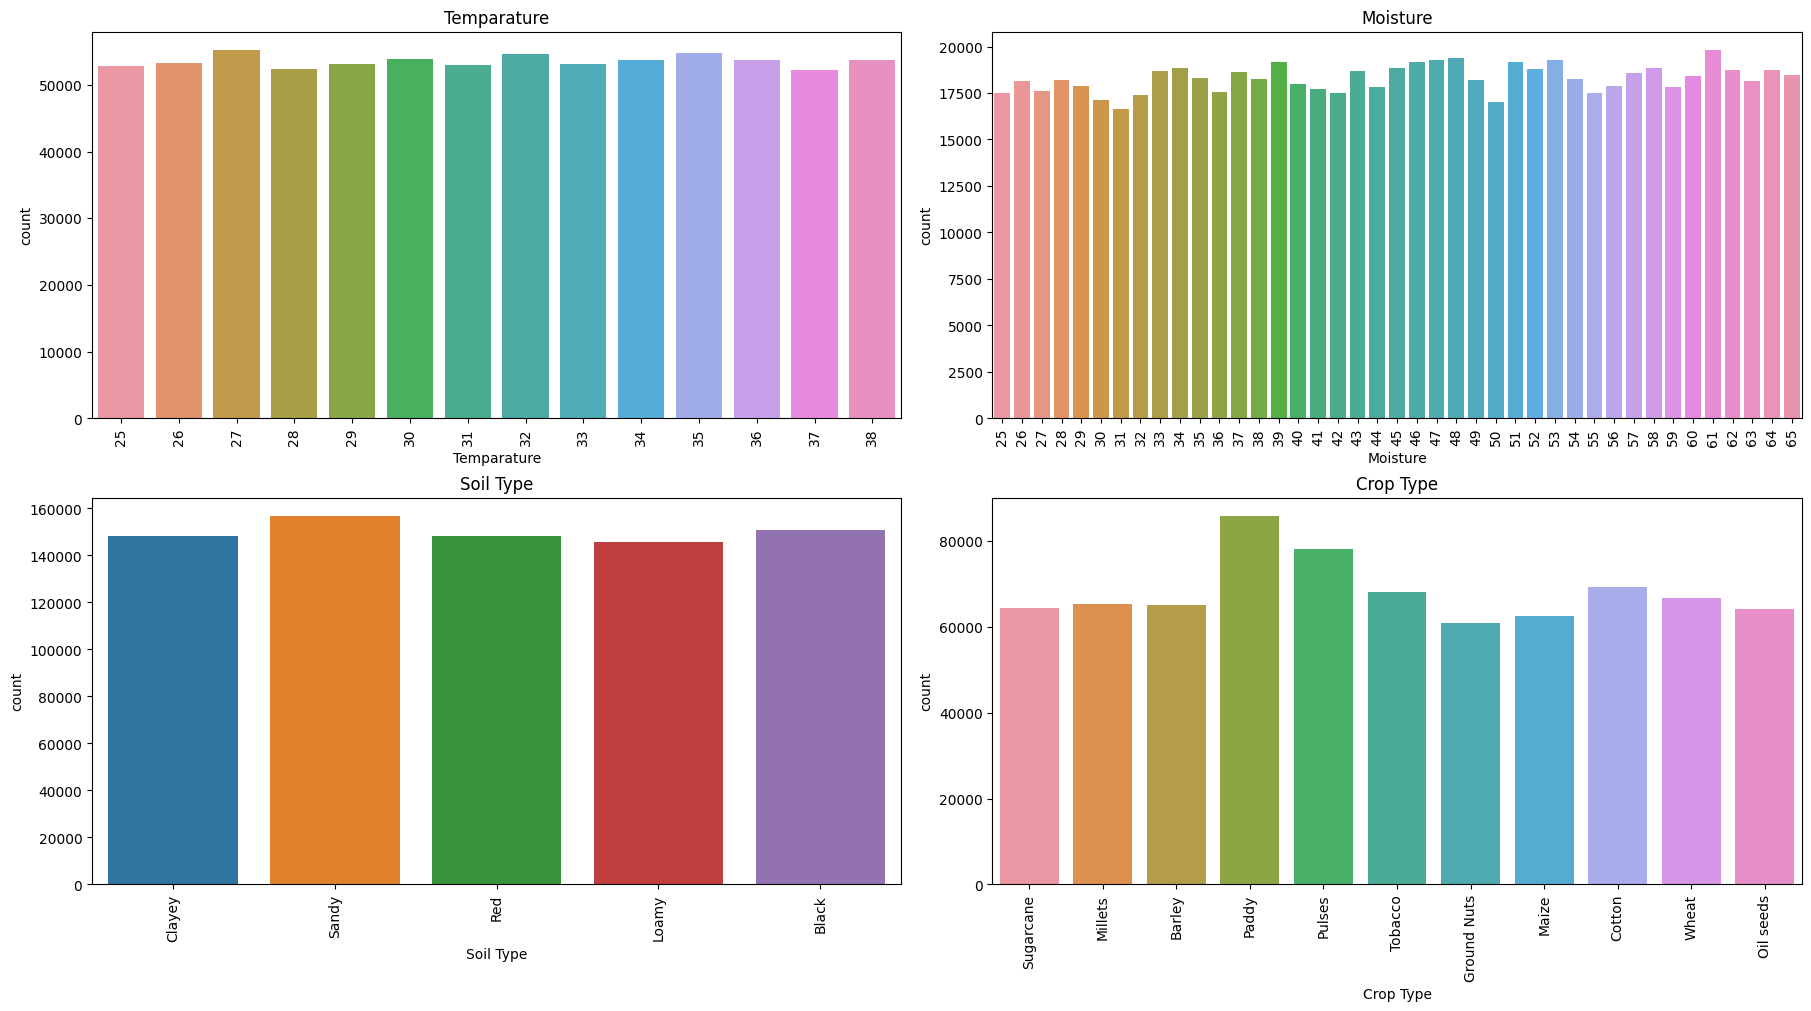

In [8]:
import seaborn as sns

cols = ["Temparature","Moisture","Soil Type",'Crop Type',]
fig = plt.figure(figsize=(18,10), layout = "constrained")
for i,col in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.countplot(train, x=col)
    plt.xticks(rotation = 90)
    plt.title(col)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

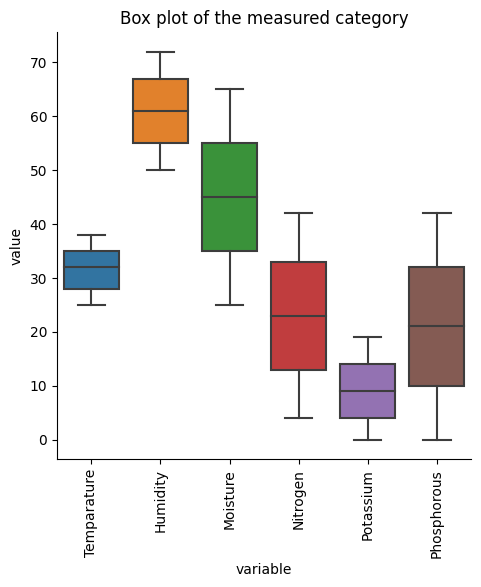

In [9]:
long = pd.melt(train, id_vars = ["Fertilizer Name"],
               value_vars = ["Temparature", "Humidity", "Moisture",
                             "Nitrogen", "Potassium", "Phosphorous"])

fig = plt.figure(figsize = (12, 8))
sns.catplot(data = long, x = "variable", y = "value", kind = "box")
plt.xticks(rotation = 90)
plt.title("Box plot of the measured category")
plt.show()

In [10]:
contingency = pd.crosstab(train['Soil Type'], train['Fertilizer Name'])
contingency

Fertilizer Name,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
Soil Type,,,,,,,
Black,23061,23656,22304,21721,21196,20501,18517
Clayey,23592,22258,22771,22508,22762,17278,17213
Loamy,22822,22571,22249,22138,21522,17476,17072
Red,21725,22779,22141,21614,21679,19077,19087
Sandy,22687,23172,22988,22908,23999,20528,20428


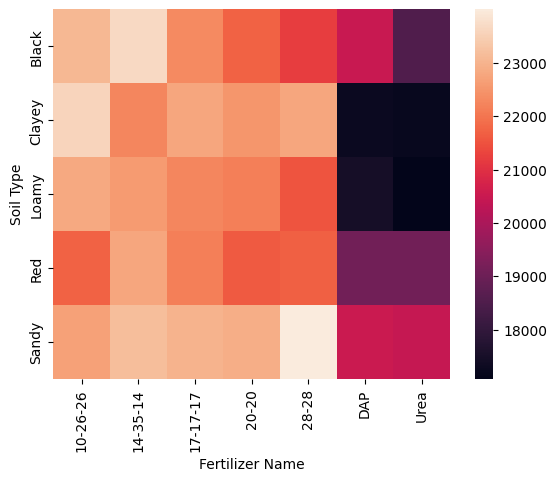

In [11]:
sns.heatmap(contingency);

In [12]:
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi2 statistic: {chi2:.4f}")
print(f"p-value: {np.round(p, 4)}")
print(f"degree of freedom: {dof}")

Chi2 statistic: 923.3333
p-value: 0.0
degree of freedom: 24


In [13]:
soil_contingency = pd.crosstab(train["Crop Type"], train["Fertilizer Name"])
soil_contingency

Fertilizer Name,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
Crop Type,,,,,,,
Barley,9447,9809,9901,9500,9684,8068,8636
Cotton,10204,9953,10337,10013,9862,9427,9375
Ground Nuts,9087,9582,9468,9322,9715,6802,6933
Maize,9821,9546,8722,8615,9232,8289,8344
Millets,9300,10121,9494,9541,9916,8148,8771
Oil seeds,9838,10038,9058,9502,9902,8153,7693
Paddy,12812,12651,12661,11580,13264,11828,10958
Pulses,12090,13064,13138,12530,10761,8375,8222
Sugarcane,10399,10410,10003,10331,9902,6910,6314


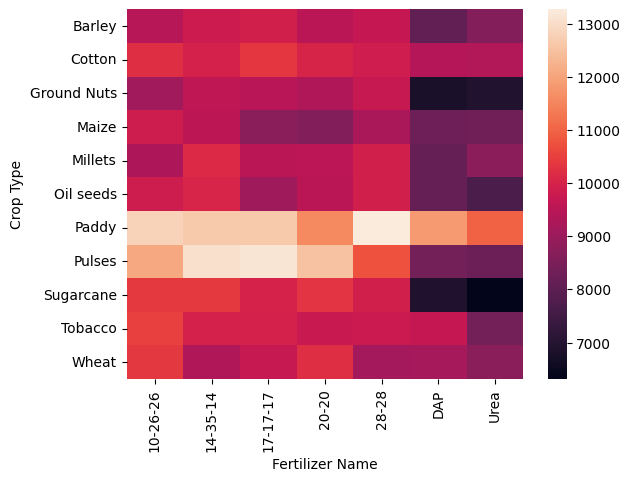

In [14]:
sns.heatmap(soil_contingency);

In [15]:
chi2, p, dof, expected = chi2_contingency(soil_contingency)
print(f"Chi2 statistic: {chi2:.4f}")
print(f"p-value: {np.round(p, 4)}")
print(f"degree of freedom: {dof}")

Chi2 statistic: 3094.4628
p-value: 0.0
degree of freedom: 60


Ho : No association between the soil/crop type on the fertilizer  
Hi : There is association between the soil/crop type on the fertilizer  
Since both p is < 0.05, Reject Ho (Null Hypothesis), there is statistic significant evident to reject the null hypothesis. The soil and crop type have an impact on the fertilizer recommendation.   

# Machine learning

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, MinMaxScaler, LabelEncoder
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score, recall_score
from sklearn.metrics import roc_curve, precision_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import xgboost as xgb

import time

set_config(transform_output="pandas")
RandomStateNumber = 13


In [17]:
train.head()
X = train.drop(["Fertilizer Name"], axis = 1)
y = train["Fertilizer Name"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state= RandomStateNumber, stratify= y)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)

In [18]:
import joblib
filename = "/kaggle/working/le_classes.pkl"
joblib.dump(le, filename)

['/kaggle/working/le_classes.pkl']

In [19]:
# Feature engineering: add Power (W) feature in the data
def feature_engineer(df):
    df = df.copy()
    df["temp_humidity"] = df["Temparature"] * df["Humidity"]
    df["temp_moisture"] = df["Temparature"] * df["Moisture"]
    df["humidity_moisture"] = df["Humidity"] * df["Moisture"]
    df["NPK"] = df["Nitrogen"] + df["Potassium"] + df["Phosphorous"]
    df["Nitrogen_ratio"] = df["Nitrogen"] / df["NPK"]
    df["Potassium_ratio"] = df["Potassium"] / df["NPK"]
    df["Phosphorous_ratio"] = df["Phosphorous"] / df["NPK"]
    return df

feature_transformer = FunctionTransformer(feature_engineer)

numeric_features = [
    "Temparature", "Humidity", "Moisture",
    "Nitrogen", "Potassium", "Phosphorous",
    # "temp_humidity", "temp_moisture", "humidity_moisture",
    # "Nitrogen_ratio", "Potassium_ratio", "Phosphorous_ratio"
]

categorical_features = [
    "Soil Type", "Crop Type"
]

# Column Transformer for the different transformation
numericColumns = ColumnTransformer(
    transformers = [
        ('num', MinMaxScaler(), numeric_features),
    ],
    remainder = "passthrough",
    verbose_feature_names_out= False
)


transformColumns = ColumnTransformer(
    transformers =[
        ('num', MinMaxScaler(), numeric_features),
         ('cat', OneHotEncoder(sparse_output= False), categorical_features)
         ],
    verbose_feature_names_out= False)

chartprocessing = Pipeline(
    [
        ('feature_engineering', feature_transformer),
        ('numeric_Columns', numericColumns)
        ]
    )

preprocessing = Pipeline(
    [
        # ('feature_engineering', feature_transformer),
        ('transformColumns', transformColumns)
        ]
    )

# # Create pipeline
pipe = Pipeline([
    ('classifier', RandomForestClassifier(random_state= RandomStateNumber)) # Placeholder model
    ,
])

In [20]:
# preprocess train & test data
X_train_scaled = preprocessing.fit_transform(X_train)
X_val_scaled = preprocessing.transform(X_val)
print(X_train_scaled.info())
X_train_scaled.head()

<class 'pandas.core.frame.DataFrame'>
Index: 600000 entries, 619640 to 227020
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Temparature            600000 non-null  float64
 1   Humidity               600000 non-null  float64
 2   Moisture               600000 non-null  float64
 3   Nitrogen               600000 non-null  float64
 4   Potassium              600000 non-null  float64
 5   Phosphorous            600000 non-null  float64
 6   Soil Type_Black        600000 non-null  float64
 7   Soil Type_Clayey       600000 non-null  float64
 8   Soil Type_Loamy        600000 non-null  float64
 9   Soil Type_Red          600000 non-null  float64
 10  Soil Type_Sandy        600000 non-null  float64
 11  Crop Type_Barley       600000 non-null  float64
 12  Crop Type_Cotton       600000 non-null  float64
 13  Crop Type_Ground Nuts  600000 non-null  float64
 14  Crop Type_Maize        600000 non-nu

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
619640,0.461538,0.500000,0.725,0.289474,0.578947,0.857143,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
714186,0.846154,0.500000,0.625,0.815789,0.210526,0.119048,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
476918,0.538462,0.272727,0.625,0.131579,0.526316,0.595238,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
230655,0.000000,0.045455,0.225,0.973684,0.368421,0.500000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
151804,0.307692,0.227273,0.000,0.815789,0.947368,0.023810,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
filename = "/kaggle/working/preprocess.pkl"
joblib.dump(preprocessing, filename)

['/kaggle/working/preprocess.pkl']

## Model

In [22]:
# Stratified KFold for cross valuation score

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state= RandomStateNumber)
summaries = []
scoring_metrics = "accuracy"

custom metric scoring

In [23]:
import numpy as np

def map_at_3(y: np.ndarray, y_pred_proba: np.ndarray) -> float:
    """
    Compute MAP@3 using NumPy arrays.
    
    Args:
        y: 1D array of true labels (n_observations,)
        y_pred_proba: 2D array of predicted labels (n_observations, n_predictions)
                Must have at least 3 columns
    
    Returns:
        MAP@3 score (float)
    """
    # Extract top 3 predictions
    top3 = np.argsort(y_pred_proba, axis=1)[:, -3:][:, ::-1] # top1 
    
    # Create boolean mask of correct predictions
    correct_mask = (top3 == y[:, None])
    
    # Find first correct position in each row
    first_correct_idx = np.argmax(correct_mask, axis=1)
    
    # Mask for rows with at least one correct prediction
    has_correct = np.any(correct_mask, axis=1)
    
    # Compute precision scores: 1/(position+1) for correct predictions, else 0
    precisions = np.where(has_correct, 1.0 / (first_correct_idx + 1), 0.0)
    
    return np.mean(precisions)


In [24]:
from sklearn.metrics import make_scorer
# Create scorer object
map3_scorer_obj = make_scorer(map_at_3, needs_proba=True, greater_is_better=True)

## XGBoost

In [25]:
xgb_classisfier = xgb.XGBClassifier(random_state= RandomStateNumber)
xgb_classisfier.fit(X_train_scaled, y_train)

y_pred = xgb_classisfier.predict(X_val_scaled)
y_pred

test_accuracy = accuracy_score(y_val, y_pred)
print("Test accuracy", test_accuracy)
print("\nClassification Report\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))



Test accuracy 0.19408

Classification Report
               precision    recall  f1-score   support

           0       0.20      0.23      0.21     22777
           1       0.19      0.26      0.22     22887
           2       0.20      0.24      0.22     22491
           3       0.19      0.19      0.19     22178
           4       0.19      0.21      0.20     22232
           5       0.20      0.13      0.16     18972
           6       0.19      0.08      0.11     18463

    accuracy                           0.19    150000
   macro avg       0.19      0.19      0.19    150000
weighted avg       0.19      0.19      0.19    150000


Confusion Matrix:
 [[5212 4495 3699 3238 3503 1622 1008]
 [3910 5910 3846 3066 3453 1713  989]
 [3692 4376 5290 3072 3440 1606 1015]
 [3818 4287 3758 4131 3426 1747 1011]
 [3694 4175 3688 3249 4701 1654 1071]
 [3156 3563 2908 2845 3115 2460  925]
 [3035 3538 3129 2626 3127 1600 1408]]


In [ ]:
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 9],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.7, 1.0],
    "colsample_bytree": [0.7, 0.85, 1.0],
    "reg_alpha": [0, 0.01, 0.1, 1, 10],
    "reg_lambda": [0.5, 0.7, 1, 1.3]
}

xgb_model = xgb.XGBClassifier(random_state= RandomStateNumber)

grid_search = RandomizedSearchCV(
    xgb_model, param_grid, cv = stratified_cv, scoring = map3_scorer_obj, n_iter=15, n_jobs=-1, verbose =  1
)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [ ]:
best_xgb = grid_search.best_estimator_
best_param = grid_search.best_params_
print("best Parameter:", best_param)
print("best score", grid_search.best_score_)

In [ ]:
import joblib
filename = "/kaggle/working/best_model.pkl"
joblib.dump(best_xgb, filename)

In [ ]:
y_pred = best_xgb.predict(X_val_scaled)
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.classes_)
disp.plot()
plt.title(f" Confusion Matrix")
plt.xticks(rotation = 90)
plt.show()

print(classification_report(y_val, y_pred, target_names=le.classes_))

In [ ]:
y_pred_proba = best_xgb.predict_proba(X_val_scaled)
mapAt3 = map_at_3(y = y_val, y_pred_proba = y_pred_proba)
print(f"NAP@3 of the validation set = {mapAt3}")
# y_pred_proba

In [ ]:
import joblib
model = joblib.load("")

In [ ]:
y_pred = best_xgb.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

# Test code for map_at_3

In [ ]:
import numpy as np

def map_at_3(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Compute MAP@3 using NumPy arrays.
    
    Args:
        y_true: 1D array of true labels (n_observations,)
        y_pred: 2D array of predicted labels (n_observations, n_predictions)
                Must have at least 3 columns
    
    Returns:
        MAP@3 score (float)
    """
    # Extract top 3 predictions
    top3 = y_pred[:, :3]
    
    # Create boolean mask of correct predictions
    correct_mask = (top3 == y_true[:, None])
    
    # Find first correct position in each row
    first_correct_idx = np.argmax(correct_mask, axis=1)
    
    # Mask for rows with at least one correct prediction
    has_correct = np.any(correct_mask, axis=1)
    
    # Compute precision scores: 1/(position+1) for correct predictions, else 0
    precisions = np.where(has_correct, 1.0 / (first_correct_idx + 1), 0.0)
    
    return np.mean(precisions)

# Example usage
y_true = np.array(['A', 'B', 'C'])
y_pred = np.array([
    ['A', 'B', 'C', 'D', 'E'],
    ['B', 'A', 'C', 'D', 'E'],
    ['C', 'A', 'C', 'D', 'C']
])

score = map_at_3(y_true, y_pred)
print(f"MAP@3: {score:.4f}")  # Output: MAP@3: 1.0000


In [ ]:
import numpy as np

def map_at_3_numpy(y: np.ndarray, y_pred_proba: np.ndarray) -> float:
    """
    Compute MAP@3 for true labels and predicted label matrix.
    
    Args:
        y: 1D array of true labels (n_samples,)
        y_pred: 2D array of predicted labels (n_samples, n_predictions)
    
    Returns:
        MAP@3 score (float)
    """
    top2 = np.argsort(y_pred_proba, axis=1)[:, -2:][:, ::-1] 
    first_correct_idx = np.argmax(correct_mask, axis=1)
    has_correct = np.any(correct_mask, axis=1)
    precisions = np.where(has_correct, 1.0 / (first_correct_idx + 1), 0.0)
    return np.mean(precisions)


In [ ]:
import numpy as np

def map_at_3(y: np.ndarray, y_pred_proba: np.ndarray) -> float:
    """
    Compute MAP@3 using NumPy arrays.
    
    Args:
        y: 1D array of true labels (n_observations,)
        y_pred_proba: 2D array of predicted labels (n_observations, n_predictions)
                Must have at least 3 columns
    
    Returns:
        MAP@3 score (float)
    """
    # Extract top 2predictions
    top2 = np.argsort(y_pred_proba, axis=1)[:, -1:][:, ::-1] # top1 
    
    # Create boolean mask of correct predictions
    correct_mask = (top2 == y[:, None])
    
    # Find first correct position in each row
    first_correct_idx = np.argmax(correct_mask, axis=1)
    
    # Mask for rows with at least one correct prediction
    has_correct = np.any(correct_mask, axis=1)
    
    # Compute precision scores: 1/(position+1) for correct predictions, else 0
    precisions = np.where(has_correct, 1.0 / (first_correct_idx + 1), 0.0)
    
    return np.mean(precisions)


In [ ]:
from sklearn.metrics import make_scorer
# Create scorer object
map3_scorer_obj = make_scorer(map_at_3, needs_proba=True, greater_is_better=True)

In [ ]:
from sklearn.metrics import make_scorer
# Create scorer object
map3_scorer_obj = make_scorer(map_at_3, needs_proba=True, greater_is_better=True)

In [ ]:
from sklearn.metrics import make_scorer
# Create scorer object
map3_scorer_obj = make_scorer(map_at_3, needs_proba=True, greater_is_better=True)

In [ ]:
from sklearn.metrics import make_scorer
# Create scorer object
map3_scorer_obj = make_scorer(map_at_3, needs_proba=True, greater_is_better=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Example classifier with probability enabled
clf = SVC(probability=True, random_state=0)

# Parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV with MAP@3 scorer
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring=map3_scorer_obj,  # Use our custom scorer
    cv=5,
    verbose=1
)

# Fit on sample data
# from sklearn.datasets import load_iris
# X, y = load_iris(return_X_y=True)
grid_search.fit(X, y)

# Results
print(f"Best params: {grid_search.best_params_}")
print(f"Best MAP@3: {grid_search.best_score_:.4f}")
